In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
from os import walk
import csv

import sys
from PIL import Image
import scipy as sc
import gdal
import math
from scipy.interpolate import interp1d
import os
import scipy

# Base paths

In [5]:
base_path = '' 


# Parameters

In [6]:
iq1,iq2,iq3=106,147,168 # defines the position of lines in temp. plot (numbers itself correspond to a position in array)
it1=0
t=np.array([126.8]) 

# Load files

In [7]:
files = []
i=0
for (dirpath, dirnames, filenames) in walk(base_path):
    files.extend(filenames)
    break

#----S(Q)-----
q_Sq_a1_b1 = np.load(base_path+'q_Sq_OO_r2578_2630.npy')
Sq_a1_b1 = q_Sq_a1_b1[1]
q = q_Sq_a1_b1[0]

Sq_plot = np.zeros([26,len(q)])
Sq_plot[0:26] = Sq_a1_b1[3:29]         #full length is 53 , start at files 2581 = 80 K


#----gr-----
r_gr_a1_b1 = np.load(base_path+'r_gr_OO_r2578_2630.npy')
gr_a1_b1 = r_gr_a1_b1[1]
r = r_gr_a1_b1[0]

gr_plot = np.zeros([26,len(r)])
gr_plot[0:26] = gr_a1_b1[3:29]


print Sq_a1_b1.shape


(53, 2235)


# Temperature

In [8]:
T=np.array([80,92,93.7,96.4,98.5,100.3,102.9,104.4,106.3,108.2,110.1,112.2,113.9,115.7,117.7,119.6,121.6,123.5,125.4,127.3,129.2,131.1,133.1,134.9,136.9,138.9])

print T
print T.shape

[  80.    92.    93.7   96.4   98.5  100.3  102.9  104.4  106.3  108.2
  110.1  112.2  113.9  115.7  117.7  119.6  121.6  123.5  125.4  127.3
  129.2  131.1  133.1  134.9  136.9  138.9]
(26,)


#  Plot fraction curve and g(r)

Do you want to save file? [Y/n]: n


<Figure size 432x288 with 0 Axes>

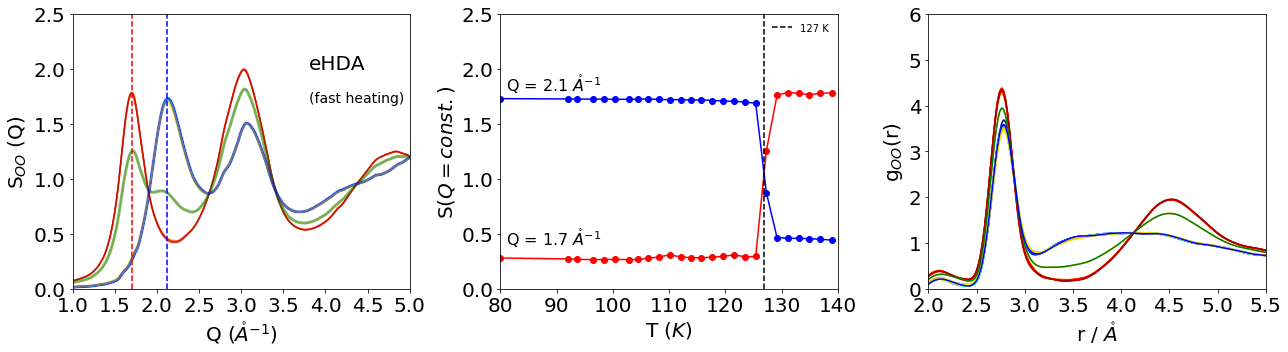

In [9]:
plt.figure()
plt.figure(figsize = (18,5))

#-----------------------------------------------
# --plot S(Q)
ax1 = plt.subplot(1,3,1)
for i in range(len(Sq_plot)):    
    color_index = float(i)/float(len(Sq_plot))
    color = plt.cm.jet(color_index)
    plt.plot(q,Sq_plot[i],alpha=0.5,color=color,label=i)
plt.plot(q,Sq_plot[19],alpha=0.5,color='green',linewidth=3)
plt.plot(q,Sq_plot[0],alpha=0.5,color='blue',linewidth=3)
       
plt.xlabel('Q ($\mathring{A}^{-1}$)', fontsize=20)
plt.ylabel('S$_{OO}$ (Q)', fontsize=20)
plt.xlim([1,5])
plt.ylim([0,2.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.text(3.8,2,'eHDA',fontsize=20)
plt.text(3.8,1.7,'(fast heating)',fontsize=14)

plt.axvline(x=q[iq1],ymin=0,ymax=10000,c="red",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq1])
plt.axvline(x=q[iq2],ymin=0,ymax=10000,c="blue",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq2])

#-------------------------------------------------
#----------------------------------------------
# --plot g(r)
ax2 = plt.subplot(1,3,3)    
    
for i in range(len(gr_plot)):
	color_index = float(i)/float(len(gr_plot))
	color = plt.cm.jet(color_index)
	plt.plot(r,gr_plot[i,:],color=color,label=i)
plt.plot(r,gr_plot[19],color='green')
plt.plot(r,gr_plot[0],color='blue')

plt.xlabel('r / $\mathring{A}$', fontsize=20)
plt.ylabel('g$_{OO}$(r)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
plt.xlim((2,5.5))
plt.ylim((0,6.0))


#****************************************************************
# plot Intensity vs time for eHDA
plt.subplot(1,3,2)
plt.plot(T,Sq_plot[:,iq1], color='red', linestyle='solid', marker='o')
plt.plot(T,Sq_plot[:,iq2], color='blue', linestyle='solid', marker='o')
plt.xlabel('T $(K)$', fontsize=20)
plt.ylabel('S$(Q=const.)$', fontsize=20)

plt.xlim([80,140])
plt.xticks(fontsize=20)
plt.ylim([0,2.5])
plt.yticks(fontsize=20)

plt.axvline(x=t[it1],ymin=0,ymax=10000,c="black",linewidth=1.5,linestyle='--',label = '127 K')
plt.text(81,1.8,'Q = 2.1 $\mathring{A}^{-1}$',fontsize=16)
plt.text(81,0.4,'Q = 1.7 $\mathring{A}^{-1}$',fontsize=16)

plt.legend(frameon=False)

plt.tight_layout()

import click
if click.confirm('Do you want to save file?', default=True):
    plt.savefig(base_path+"eHDA-LDA_fast-heating.png")

plt.show()